# Metropolis-Hastings Homework

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

### Problem 1

Let $X = {1,...,M}$ be a finite state space and assume that $B = [b_{ij}]$ is the transition matrix for a proposal Markov chain on $X$. Let $s = (s_1,...,s_M)$ be a desired (target) stationary distribution with every $s_i > 0$. Prove that the Markov chain produced by the Metropolis-Hastings algorithm, using $B$ as the proposal, has $s$ as its stationary distribution. Hint: Prove reversibility.

Let $Q$ be the matrix produced by the Metropolis-Hastings algorithm. We show that $s$ is a stationary distribution for $Q$. To accomplish this, we show that $s$ and $Q$ together satisfy the reversibility condition, which them implies that $s$ is a stationary distribution for $Q$. <br>

First, note that $q_{ij} := b_{ij}a_{ij}$ and $a_{ij} := min(1, \frac{s_jb_{ji}}{s_ib_{ij}})$.

Case 1: Assume $s_ib_{ij} < s_jb_{ji}$
> $s_iq_{ij} = s_ib_{ij}a_{ij} = s_ib_{ij} min(1, \frac{s_jb_{ji}}{s_ib_{ij}}) = s_ib_{ij} 1 = s_ib_{ij}$ <br>
$s_jq_{ji} = s_jb_{ji}a_{ji} = s_jb_{ji} min(1, \frac{s_ib_{ij}}{s_jb_{ji}}) = s_jb_{ji} \frac{s_ib_{ij}}{s_jb_{ji}} = s_ib_{ij}$ <br>
Hence $ s_iq_{ij} = s_jq_{ji} $.

Case 2: Assume $s_ib_{ij} \geq s_jb_{ji}$
> $s_iq_{ij} = s_ib_{ij}a_{ij} = s_ib_{ij} min(1, \frac{s_jb_{ji}}{s_ib_{ij}}) = s_ib_{ij} \frac{s_jb_{ji}}{s_ib_{ij}} = s_jb_{ji}$ <br>
$s_jq_{ji} = s_jb_{ji}a_{ji} = s_jb_{ji} min(1, \frac{s_ib_{ij}}{s_jb_{ji}}) = s_jb_{ji} 1 = s_jb_{ji}$ <br>
Hence $ s_iq_{ij} = s_jq_{ji} $.

Thus $Q$ is reversable with state $s$. Therefore $s$ is a stationary distribution. 

### Problem 2

Implement a Metropolis-Hastings sampler for the Zipf distribution. Your code should accept a positive integer $M$ as the number of states, a float $\alpha > 0$ defining the target distribution $P(k) \propto \frac{1}{k^\alpha}$, a positive integer $N$ as the total number of samples, an initial state $x_0$, and a positive integer $K$ as the length of the burn-in period. Your code should return an array $[x_K, x_{K+1},...,x_{K+N}]$ of samples from the Zipf distribution.

* Sample with $M = 20$, $\alpha = 2$, $N = 105$, $x_0 = 1$, and $K = 0$.
    
* Plot a normed histogram of your sample and on the same graph plot the target distribution (this last step will require you to compute $Z = \sum_{k=1}^{20} \frac{1}{k^2}$).

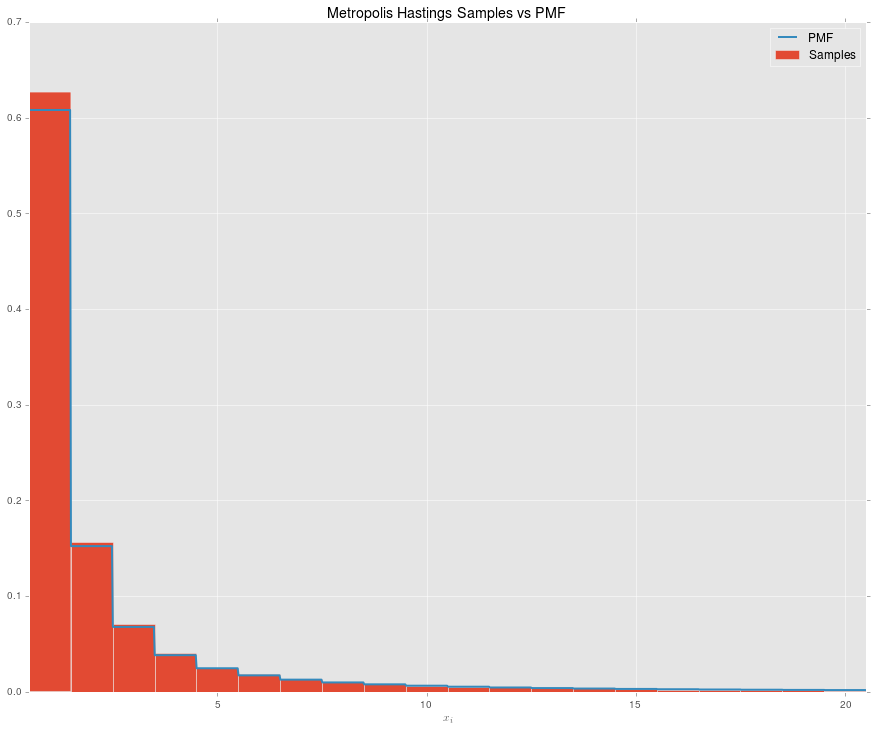

In [2]:
def zipf_sample(M, alpha, N, x0, K):
    ''' 
    Draws samples of Zipf distribution using 
    the Metropolis-Hasting algorithm for MCMC
    
    Parameters:
    M - number of states
    alpha - parameters for Zipf distribution
    N - number of samples
    x0 - initial state
    K - number of steps to take in "burn out" stage
    
    Returns:
    samples - samples that were drawn using 
    '''
    s = np.array([1./(k**alpha) for k in range(1,M+1)])
    def B(xt):
        '''
        Represents the transition matrix for our auxillary markov process
        accepts 'xt' as current state
        returns proposed state
        '''
        if xt==1:
            return np.random.choice([1,2])
        elif xt==M:
            return np.random.choice([M-1, M])
        else:
            return np.random.choice([xt-1, xt+1])
    samples = []
    i = x0 # 'i' will represent our current state
    A = lambda i,j: np.min([1, s[j-1]/s[i-1]]) 
    for t in range(1,N+K+1):
        j = B(i)
        if np.random.random() <= A(i,j):
            i = j
        if t > K:
            samples.append(i)
    return np.array(samples)


samples = zipf_sample(20,2,10**5,1,0)

# this code recenters our histogram so it looks pretty
d = np.diff(np.unique(samples)).min()
left_of_first_bin = samples.min() - float(d)/2
right_of_last_bin = samples.max() + float(d)/2

# calculate pmf of the Zipf distribution
Z = np.sum([1./(k**2) for k in range(1,21)])
X = np.linspace(1,21,1000)
Y = stats.zipf.pmf(np.floor(X), 2)
X = X - .5 # move the x-variables so that it lines up with the histogram appropriately

# create figure
plt.figure(figsize=(15,12))
plt.hist(samples, np.arange(left_of_first_bin, right_of_last_bin + d, d), normed=True, label='Samples') #bins=len(np.unique(samples))
plt.xlim(0.5,20.5)
plt.plot(X,Y, lw=2, label='PMF')
plt.legend()
plt.title("Metropolis Hastings Samples vs PMF")
plt.rc('text',usetex=True)
plt.xlabel('$x_i$')
plt.show()